
# NLP Essentials Project

# Sentiment Analysis Online Movie Reviews

### Project Scenario

In a recent [market research](https://newsroom.ibm.com/IBMs-Global-AI-Adoption-Index-2021?lnk=ushpv18ai3) by IBM, almost one-third of IT professionals surveyed globally say their business is using Artificial Intelligence (AI). The survey reported almost half of businesses today are now using applications powered by natural language processing (NLP).

NLP, specifically 'Sentiment Analysis', can provide a key business advantage by abstracting from unstructured text data the negative or positive attitude of the writer/author. This crucuial insight can help turn web data into market intelligence for the business. 

A request has been received from the web development department to add 'Sentiment Analysis' feature to a movie reviews page. 

The insights from the sentiment analysis will be used to promote more popular movies.  

In this project, you are tasked to create a prototype NLP project that is capable of 'Sentiment Analysis' from movie reviews. 

---

In this assignment, you will be working **individually** on the 'Sentiment Analysis' project. 

Complete ALL THE TASKS ( From 1 to 7). You may refer to online documentation (e.g. keras, pandas, etc) for help on syntax. 

`No copying of codes wholesale is allowed.`

Use a random_state = 42 where appropriate.

Broadly, this project will require the following steps:

1. Importing Various Modules.
1.Problem scoping.
>1.1. Defining problem statement using 4Ws (Who, What, Where, Why) problem canvas from the project scenario.

2.Data acquisition and Data exploration.
>2.1.Importing various modules.

>2.2.Preparing the data.

>>2.2.1. Preprocess Text.

>>2.2.2. Perform image pre-processing and data augmentation.

>>2.2.3.Split it into train, validate, and test datasets.

>>2.2.4. Perform Feature Extraction Using TF-IDF.

3.Modelling.

>3.1. Create the model - Build a model based on Build a model based on Neural Network.





## Task 2: Data acquisition and Data exploration.

Collect an additional 30 samples of positive reviews and 30 samples of negative reviews from this website:
https://www.rottentomatoes.com/browse/movies_in_theaters/sort:newest?page=1


Add these to the given dataset respectively. 

The final dataset should have 1000 positive reviews and 1000 negative reviews. 


In [1]:
import pandas as pd
import numpy as np
import string
import re
import nltk
import os
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns


nltk_stopwords = stopwords.words('english')

In [3]:
pos_list = []
neg_list = []

pos_folder = './data/pos'
neg_folder = './data/neg'

# Load text from the Positive Reviews folder
for filename in os.listdir(pos_folder):
    if filename.endswith('.txt'):
        text_path = os.path.join(pos_folder, filename)
        with open(text_path, 'r', encoding='utf-8') as file:
            text = file.read()
            pos_list.append([text, '1'])

# Load text from the Negative Reviews folder
for filename in os.listdir(neg_folder):
    if filename.endswith('.txt'):
        text_path = os.path.join(neg_folder, filename)
        with open(text_path, 'r', encoding='utf-8') as file:
            text = file.read()
            neg_list.append([text, '0'])

pos_list = pd.DataFrame(pos_list, columns=['review', 'sentiment']) 
neg_list = pd.DataFrame(neg_list, columns=['review', 'sentiment'])




df = pd.concat([pos_list,neg_list],  ignore_index=True)

df

,review,sentiment
0,Focus Reset\nHome\n\n\n\nGuides\nInteractive M...,1
1,\nTV\nTHE BOYS (S1E7+8) “The Self Preservation...,1
2,Skip to main content\n\nflag of US\nTRENDING\n...,1
3,Skip to Content\nSearch\nMama's Geeky\n\nThe B...,1
4,Skip to content\nLyles Movie Files\nthe boys p...,1
...,...,...
2055,"if anything , "" stigmata "" should be taken as ...",0
2056,"john boorman's "" zardoz "" is a goofy cinematic...",0
2057,the kids in the hall are an acquired taste . \...,0
2058,there was a time when john carpenter was a gre...,0


In [4]:
# Print the number of reviews in each list
print("Number of positive reviews:", len(pos_list))
print("Number of negative reviews:", len(neg_list))

# Print the first positive and negative reviews
if len(pos_list) > 0:
    print("First positive review:\n", pos_list.head(1))

if len(neg_list) > 0:
    print("First negative review:\n", neg_list.head(1))

Number of positive reviews: 1030
Number of negative reviews: 1030
First positive review:
                                               review sentiment
0  Focus Reset\nHome\n\n\n\nGuides\nInteractive M...         1
First negative review:
                                               review sentiment
0  \nHome  Blog  Popcorn Parent Movie Reviews\nPo...         0


## Task 2.1: Importing various modules - Data Cleansing

Import the relevant NLTK libraries. 

In [5]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist

# Download NLTK resources if needed
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gohji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gohji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gohji\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Task 2.2: Data exploration

Use methods and ideas that you can think of to explore the data.

1. Showcase some interesting information about this data.
2. Showcase any statistics about this data that can help you in your cleaning.

$\color{cyan}{\text{Bonus marks will be award for interesting insights into the data}}$

Missing values in each column:
 review       0
sentiment    0
dtype: int64

Basic Statistics:
Number of reviews: 2060
Number of unique sentiments: 2
Distribution of sentiments:
 sentiment
1    1030
0    1030
Name: count, dtype: int64


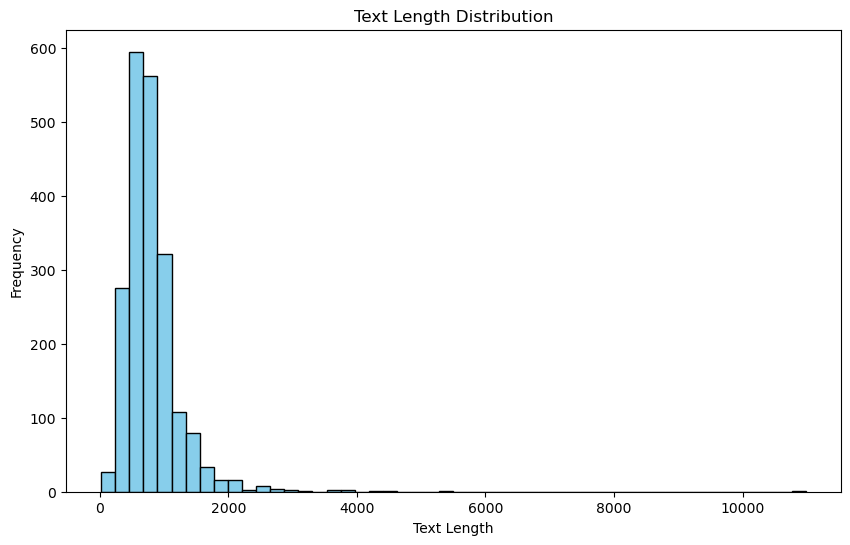

c:\Users\gohji\anaconda3\envs\nlpe\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gohji\anaconda3\envs\nlpe\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gohji\anaconda3\envs\nlpe\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


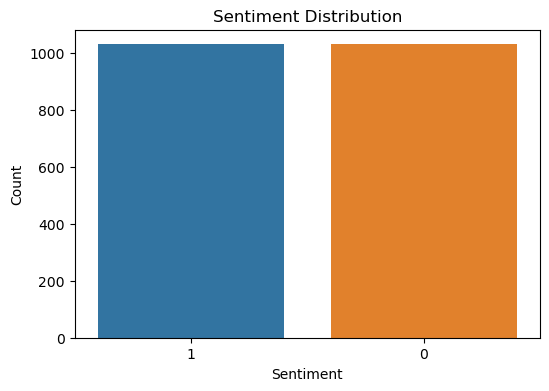

In [6]:
# Data Exploration

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Basic Statistics
print("\nBasic Statistics:")
print("Number of reviews:", len(df))
print("Number of unique sentiments:", df['sentiment'].nunique())
print("Distribution of sentiments:\n", df['sentiment'].value_counts())

# Tokenization and Text Length Analysis
df['tokenized_text'] = df['review'].apply(word_tokenize)
df['text_length'] = df['tokenized_text'].apply(len)

# Visualize Text Length Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Word Frequency Analysis
all_words = [word for tokens in df['tokenized_text'] for word in tokens]
fdist = FreqDist(all_words)

# Remove stopwords and perform word frequency analysis again
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in all_words if word.lower() not in stop_words]
fdist_filtered = FreqDist(filtered_words)

# Sentiment Distribution Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


### Task 2.2.1: Importing various modules - Add More Stops Words To NLTK

Add the following to stopwords:
1. 'www'
2. '.com'
3. 'http'

In [7]:
import nltk
from nltk.corpus import stopwords

custom_stopwords = ['www', '.com', 'http']
all_stopwords = list(stopwords.words('english')) + custom_stopwords


# Update NLTK stopwords with the combined list
nltk.corpus.stopwords.words = lambda lang: all_stopwords if lang == 'english' else []

# Check the updated stopwords
print("Updated Stopwords List:")
print(all_stopwords)


Updated Stopwords List:
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own',

### Task 2.2.2 : Process Text - Tokenize, Remove Punctuation, Lemmatize 

Complete the following 3 functions.

Feel free to add additional cleaning functions and improve `process_text()` if you like to.

Feel free to change the way the functions are written as well if you like to.

In [8]:
def clean_text(input_text):
    output_text = str(input_text).translate(str.maketrans('','',string.punctuation)) # remove punct
    output_text = output_text.lower() # lower text
    output_text = re.sub(r'\d+', '', output_text) # or use the \W method to remove numbers/non words
    return output_text

def lemm_text(input_text): # lemmatizer code / or use stemmer
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(input_text)
    words = [word for word in words if word.lower() not in nltk_stopwords] # stopword removal
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemma_output = ' '.join(lemmatized_words)
    return lemma_output

def process_with_lemm(input_text):
    output_text = clean_text(input_text)
    output_text = lemm_text(output_text)
    return output_text

## Task 3: Randomly Combine Review Texts From Positive & Negative Reviews Data Sets. 

Preprocessed texts to remove punctuation, remove stop words and lemmatized the text.

Combine all these texts into a single dataset where each preprocessed review and its label are in a format that is good for analysis: 

Example 1:

**A tuple format**

`data=[('preprocessed review text', label), ('preprocessed review text', label) ...]`

* ('this movie is nice', 1)
* ('this movie is lousy',0)

Example 2:

**A pandas dataframe format**
```
0	one reviewer mentioned watching oz episode you...	1
1	wonderful little production br br filming tech...	1
2	thought wonderful way spend time hot summer we...	1
3	basically there family little boy jake think t...	0
4	petter matteis love time money visually stunni...	1
```

Label for positive and negative review:
* `Positive review is given 1.`
* `Negative review is given 0.`


The following incomplete code is given as a guide as an example to load texts and labels into lists.

You can prepare your own code to load it in any format that you wish.

In [9]:
df_cleaned = df.copy()
df_cleaned['review'] = df_cleaned['review'].apply(process_with_lemm)
df_cleaned.head()

,review,sentiment,tokenized_text,text_length
0,focus reset home guide interactive map store r...,1,"[Focus, Reset, Home, Guides, Interactive, Maps...",2886
1,tv boy se “ self preservation society ” “ foun...,1,"[TV, THE, BOYS, (, S1E7+8, ), “, The, Self, Pr...",2626
2,skip main content flag u trending best tv show...,1,"[Skip, to, main, content, flag, of, US, TRENDI...",2456
3,skip content search mama geeky boy season prem...,1,"[Skip, to, Content, Search, Mama, 's, Geeky, T...",1532
4,skip content lyles movie file boy proper prepa...,1,"[Skip, to, content, Lyles, Movie, Files, the, ...",1171


# Part 2: Perform AI Natural Language Inference

## Task 2.2.4: Feature Extraction Using TF-IDF

Perform normalization of bag of words using the TfidfTransformer. Use it the same way as above. 

Create a class, and use the .fit_transform() method with the bag of words as your argument to create your TFIDF.


In [10]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # We set max features here, because it is simply going to get too large
X_temp = tfidf_vectorizer.fit_transform(df_cleaned['review'])
X_temp = X_temp.toarray()
y_temp = pd.get_dummies(df_cleaned['sentiment'])

In [11]:
X_temp


array([[0.        , 0.        , 0.0099561 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01612448, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06542339, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [12]:
y_temp.head()


,0,1
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [13]:
y_temp.head()

,0,1
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [14]:
y = y_temp.values
print(y)
print(y.shape)

[[False  True]
 [False  True]
 [False  True]
 ...
 [ True False]
 [ True False]
 [ True False]]
(2060, 2)


### Task 2.2.3: Split Dataset Into Train Test Sets.

Split the texts into:

1. 80% for training.
2. 20% for testing.

The following incomplete code is given as a guide as an example to split the text data from a list.

You can prepare your own code to split it in any format that you wish.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_temp, y, test_size=0.2, random_state=42)

## Task 5: Create Model Using Neural Networks

Create a suitable neural network and train it. 


In [16]:
model = Sequential()
model.add(Dense(64, input_dim=X_temp.shape[1], activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320064    
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 320,194
Trainable params: 320,194
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
num_epochs = 10
history = model.fit(X_train, y_train, epochs=num_epochs, 
                    validation_data=(X_test, y_test))

Epoch 1/10


52/52 [==============================] - 1s 14ms/step - loss: 0.6534 - accuracy: 0.7045 - val_loss: 0.5773 - val_accuracy: 0.8495
Epoch 2/10
52/52 [==============================] - 1s 11ms/step - loss: 0.4382 - accuracy: 0.9181 - val_loss: 0.4221 - val_accuracy: 0.8641
Epoch 3/10
52/52 [==============================] - 0s 5ms/step - loss: 0.2418 - accuracy: 0.9654 - val_loss: 0.3547 - val_accuracy: 0.8665
Epoch 4/10
52/52 [==============================] - 0s 6ms/step - loss: 0.1370 - accuracy: 0.9867 - val_loss: 0.3387 - val_accuracy: 0.8641
Epoch 5/10
52/52 [==============================] - 0s 7ms/step - loss: 0.0794 - accuracy: 0.9976 - val_loss: 0.3366 - val_accuracy: 0.8544
Epoch 6/10
52/52 [==============================] - 0s 6ms/step - loss: 0.0500 - accuracy: 1.0000 - val_loss: 0.3312 - val_accuracy: 0.8471
Epoch 7/10
52/52 [==============================] - 0s 8ms/step - loss: 0.0336 - accuracy: 1.0000 - val_loss: 0.3370 - val_accuracy: 0.8471
Epoch 8/10
52/52 [===========

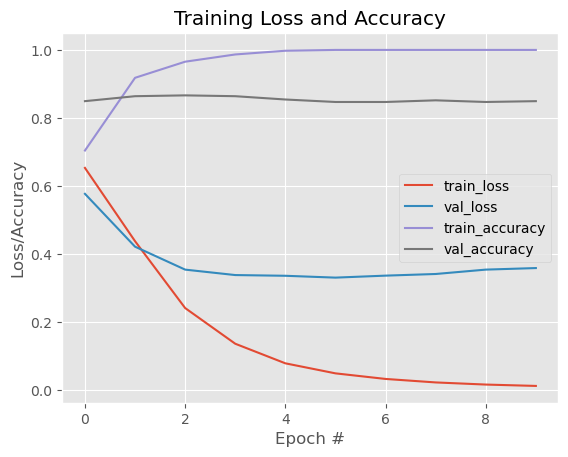

In [19]:
def plot_graphs(H, metric):
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="train_accuracy")
  plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="val_accuracy")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #" )
  plt.ylabel("Loss/Accuracy" )
  plt.legend()
  plt.savefig("model history")
  plt.show()
plot_graphs(history,'accuracy')

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
 
predicted = model.predict(X_test)
predicted_label=[np.argmax(each) for each in np.array(predicted)]
y_test_label=[np.argmax(each) for each in np.array(y_test)]
print("\nConfusion matrix:")
print(confusion_matrix(y_test_label, predicted_label))
print(classification_report(y_test_label, predicted_label))

13/13 [==============================] - 0s 8ms/step

Confusion matrix:
[[175  24]
 [ 38 175]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       199
           1       0.88      0.82      0.85       213

    accuracy                           0.85       412
   macro avg       0.85      0.85      0.85       412
weighted avg       0.85      0.85      0.85       412



## Task 6: Test For Unseen Text

Use the trained model to make predictions on totally unseen text. 

In [21]:


# Function to encode a new sentence
def encode_sentence(input_text):
    encoded_text = tfidf_vectorizer.transform([input_text])
    encoded_text = encoded_text.toarray()
    return encoded_text

def prediction(encoded_text):
    predictions = model.predict(encoded_text)
    predicted_class = np.argmax(predictions)
    print("The predicted probability is:", predictions)
    print("The predicted class is:", predicted_class)

    if predicted_class == 0:
        print("The provided text is classified as: Negative")
    else:
        print("The provided text is classified as: Postive")


# New sentences to predict
neg_text = "Just when you think you’ve seen the worst movie ever made, along comes this pile of toxic waste."
pos_text = "This is going to go down as one of 2022’s most entertaining motion pictures."




## Task 7: Apply Cosine Similarity To Find Similar Texts

Based on the given unseen positive and negative text previously, find the top most similar sentences from the training dataset. 

Reminder: Please note that you have to use the same fitted "tfidf" model to perform feature extraction of your texts. 

In [22]:
# Define the new sentences
neg_text = "Just when you think you’ve seen the worst movie ever made, along comes this pile of toxic waste."
pos_text = "This is going to go down as one of 2022’s most entertaining motion pictures."

# Encode and predict the sentiment of negative text
encoded_neg_text = encode_sentence(neg_text)
prediction(encoded_neg_text)

# Encode and predict the sentiment of positive text
encoded_pos_text = encode_sentence(pos_text)
prediction(encoded_pos_text)


1/1 [==============================] - 0s 27ms/step
The predicted probability is: [[0.99520504 0.00479504]]
The predicted class is: 0
The provided text is classified as: Negative
1/1 [==============================] - 0s 40ms/step
The predicted probability is: [[0.21967201 0.7803279 ]]
The predicted class is: 1
The provided text is classified as: Postive


In [23]:
from sklearn.metrics.pairwise import cosine_similarity

def get_cosine_similarity(text1, text2):
    vectors = tfidf_vectorizer.fit_transform([text1, text2])
    similarity = cosine_similarity(vectors[0], vectors[1])
    return similarity[0][0]


cosine = get_cosine_similarity(pos_text, neg_text)
print(cosine)

0.06274211398105578
